#  
<span style="font-family:Arial; font-weight:Bold; font-size:2.3em; color:#00b3e5;"> TextBlob Sentiment Analysis
 - pip install --upgrade nltk
 - pip install --upgrade textblob
<Br><Br>
 - pip install --upgrade spacy
 - !python -m spacy download en_core_web_sm

In [1]:
#pip install --upgrade nltk

In [2]:
#pip install --upgrade textblob

In [3]:
#pip install --upgrade spacy

In [4]:
#!python -m spacy download en_core_web_sm

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Importing Libraries

In [5]:
import numpy  as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import re, string #, unicodedata
from   bs4 import BeautifulSoup

from   textblob  import TextBlob #, Word
#from   wordcloud import WordCloud, STOPWORDS
 
#from sklearn.preprocessing import LabelBinarizer 
#from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [6]:
import nltk    

#nltk.download('punkt') 
#nltk.download('wordnet')
#nltk.download('stopwords') 

from nltk.corpus          import stopwords
#from nltk.stem.porter     import PorterStemmer
from nltk.tokenize.toktok import ToktokTokenizer
#from nltk.tokenize        import word_tokenize, sent_tokenize
#from nltk.stem            import LancasterStemmer, WordNetLemmatizer

In [7]:
import spacy   

nlp = spacy.load('en_core_web_sm', disable=['ner'])

In [8]:
tokenizer = ToktokTokenizer()

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Sentiment

In [9]:
TextBlob( 'he is a very good boy' ).sentiment

Sentiment(polarity=0.9099999999999999, subjectivity=0.7800000000000001)

In [10]:
TextBlob( 'he is a good boy' ).sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [11]:
TextBlob( 'he is a boy' ).sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [12]:
TextBlob( 'he is not a very good boy' ).sentiment

Sentiment(polarity=-0.26923076923076916, subjectivity=0.46153846153846156)

In [13]:
TextBlob( 'he is not a good boy' ).sentiment

Sentiment(polarity=-0.35, subjectivity=0.6000000000000001)

In [14]:
TextBlob( 'he is a bad boy' ).sentiment

Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)

In [15]:
TextBlob( 'he is a very bad boy' ).sentiment

Sentiment(polarity=-0.9099999999999998, subjectivity=0.8666666666666667)

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Polarity & Subjectivity
 - **Polarity:**
    - **+1** Positive
    - **0** Neutral
    - **-1** Negative
****
 - **Subjectivity:**
    - **+1** Public Opinion
    - **0**  Personal Opinion

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Loading Dataset

In [16]:
comments = pd.read_csv('sentiment_sentences.txt',delimiter='\t')
comments.sample(3)

,sentence_index,sentence
359,360,"It 's amazingly perceptive in its subtle , sup..."
4414,4415,"This charming , thought-provoking New York fes..."
9503,9504,"Donovan ... squanders his main asset , Jackie ..."


In [17]:
sentiments = pd.read_csv('sentiment_labels.txt',delimiter='\t')
sentiments.sample(3)

,phrase ids|sentiment values
111320,111320|0.52778
112417,112417|0.83333
222061,222061|0.26389


#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Feature Engineering

In [18]:
# splitting

df = sentiments.copy()
ft = 'phrase ids|sentiment values'

#phrase_id      = df[ft].str.split('|', expand=True)[0]
sentiment_value = df[ft].str.split('|', expand=True)[1]

In [19]:
data = comments[['sentence']]
data['sentiment_value'] = (sentiment_value).astype(float)
data.sample(3)

,sentence,sentiment_value
11435,You 'll just have your head in your hands wond...,0.52778
7461,"Yes , Ballistic is silly .",0.59722
8437,Sunshine State lacks the kind of dynamic that ...,0.58333


In [20]:
# correcting column names
data.columns = ['Comment','Stanford_NLP']
data.sample(3)

,Comment,Stanford_NLP
28,"At about 95 minutes , Treasure Planet maintain...",0.68056
5187,Zhuangzhuang creates delicate balance of style...,0.93056
8520,A subtle variation on I Spit On Your Grave in ...,0.44444


#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> EDA

In [21]:
data.shape

(11855, 2)

In [22]:
data.describe()

,Stanford_NLP
count,11855.000000
mean,0.502388
std,0.172716
min,0.000000
25%,0.402780
50%,0.500000
75%,0.597220
max,1.000000


In [23]:
data = data.dropna()
data.isnull().sum()

Comment         0
Stanford_NLP    0
dtype: int64

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Text Pre-Processing

In [24]:
data.replace( r'^\s*$', np.nan, regex=True, inplace=True )
data.dropna(axis=0, how='any', inplace=True)

In [25]:
data.replace( to_replace=[r'\\t|\\n|\\r','\t|\n|\r'], value=['',''], regex=True, inplace=True )

In [26]:
# removing non-ascii words
data['Comment'] = data['Comment'].str.encode('ascii','ignore').str.decode('ascii')

In [27]:
# removing punctuations
print('punctuations: ', string.punctuation )
def remove_punctuations(text):
    import string
    for p in string.punctuation:
        text = text.replace( p, '' )
    return text
data['Comment'] = data['Comment'].apply(remove_punctuations)

punctuations:  !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [28]:
# removing stopwords
stopword_list = sorted( stopwords.words('english') )
stopword_list.remove('no')
stopword_list.remove('not')
print(stopword_list)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'nor', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some', 'such', 't',

In [29]:
def remove_stopwords( text, into_lower_case=False ): 
    tokenizer =  ToktokTokenizer() 
    tokens    =  tokenizer.tokenize( text )
    tokens    = [token.strip() for token in tokens]
    if into_lower_case:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token         not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text
data['Comment'] = data['Comment'].apply(remove_stopwords)

In [30]:
# removing special characters
def remove_special_characters(text):
    text = re.sub('[^a-zA-Z0-9\s]','',text)
    return text
data['Comment'] = data['Comment'].apply(remove_special_characters)

In [31]:
# removing urls
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r' ',text)
data['Comment'] = data['Comment'].apply(remove_URL)

In [32]:
# removing integer numbers
def remove_integer_number(text):
    text = ''.join([i for i in text if not i.isdigit()])
    return text
data['Comment'] = data['Comment'].apply(remove_integer_number)

In [33]:
# cleansing
def cleanse(word):
    rx = re.compile(r'\D*\d')
    if rx.match(word): return
    return word
def return_alphanumeric(strings):
    nstrings = [' '.join(filter(None, (
    cleanse(word) for word in strings.split())))
    for string in strings.split()]
    str1 = ' '.join(nstrings)
    return str1
data['Comment'] = data['Comment'].apply(return_alphanumeric)

In [34]:
# lemmatizing
def lemmatize_text(text):
    text = nlp( text )
    text = ' '.join( word.lemma_ if word.lemma_ != '_PRON_' else word.text for word in text )
    return text
data['Comment'] = data['Comment'].apply(lemmatize_text)

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> SENTIMENT ANALYSIS

In [37]:
# SENTIMENT ANALYSIS
Sentiment_Series = data['Comment'].apply(lambda tweet: TextBlob(tweet).sentiment )
Sentiment_Series = Sentiment_Series.tolist()

In [38]:
columns = ['Popularity','Subjectivity']
df = pd.DataFrame(Sentiment_Series, columns=columns, index=data.index)
df.sample(3)

,Popularity,Subjectivity
5651,0.500000,0.562500
763,0.583333,0.916667
1564,0.175000,0.680000


In [40]:
result = pd.concat([data,df],axis=1)
result.sample(3)

,Comment,Stanford_NLP,Popularity,Subjectivity
1165,a celebration quirkiness eccentricity certain ...,0.30556,0.107143,0.485714
1426,allow we hope Nolan poise embark major career ...,0.68056,0.187500,0.500000
3659,a hallmark film increasingly important film in...,0.45833,0.350000,0.550000


In [41]:
result['Sentiment'] = 'Neutral'
result['Sentiment_Label'] = 0
result.loc[result['Popularity']>=+0.25, 'Sentiment' ] = 'Positive'
result.loc[result['Popularity']>=+0.25, 'Sentiment_Label' ] = +1
result.loc[result['Popularity']<=-0.25, 'Sentiment' ] = 'Negative'
result.loc[result['Popularity']<=-0.25, 'Sentiment_Label' ] = -1

In [42]:
result.sample(5)

,Comment,Stanford_NLP,Popularity,Subjectivity,Sentiment,Sentiment_Label
11365,one plain unimaginative romantic comedy I ever...,0.68056,-0.107143,0.428571,Neutral,0
2479,while definite weakness like rather unbelievab...,0.59722,0.083333,0.700000,Neutral,0
11097,an unsophisticated scifi drama take seriously ...,0.61111,-0.333333,0.666667,Negative,-1
9173,there might sort credible genderprovoking phil...,0.50000,0.400000,0.700000,Positive,1
3212,as banal telling may time all my Loved Ones fl...,0.58333,0.200000,0.650000,Neutral,0


#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Extracting Info

In [43]:
def Violin_Plot( df, ft ):
    plt.figure(  figsize=(3,1)  )
    sns.violinplot( x=df[ft], color='cyan' )
    plt.title(ft); plt.xlabel(''); plt.xlabel(''); plt.show()

def Box_Plot( df, ft ):
    boxprops    = dict( edgecolor = 'k', facecolor  = 'cyan', linewidth = 1 )
    medianprops = dict( color     = 'k', linewidth  = 1  )
    flierprops  = dict( marker    = 'd', markersize = 7, markerfacecolor = 'red', markeredgecolor = 'red' ) 
    plt.figure(  figsize=(3,1)  )
    sns.boxplot( x=df[ft], boxprops=boxprops, medianprops=medianprops, flierprops=flierprops )
    plt.title(ft); plt.xlabel(''); plt.show()

In [44]:
# counting sentiment labels
result['Sentiment_Label'].value_counts()

Sentiment_Label
 0    7616
 1    2927
-1    1312
Name: count, dtype: int64

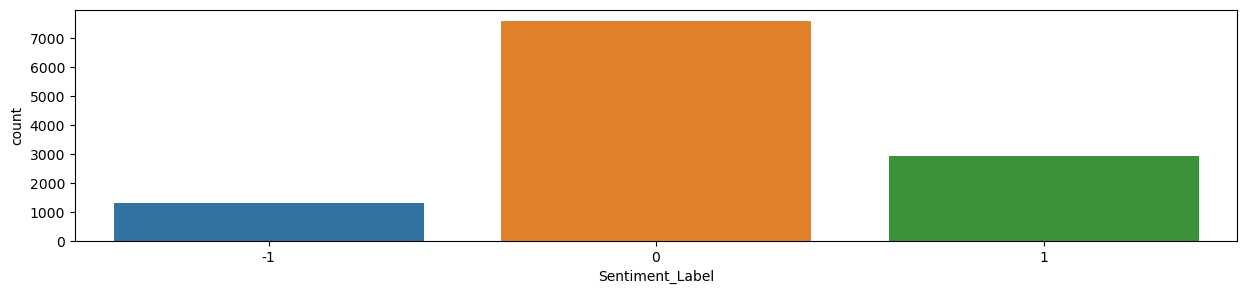

In [45]:
fig, ax = plt.subplots(figsize=(15,3))
sns.countplot(x='Sentiment_Label', ax=ax, data=result ); plt.show()

In [46]:
# descriptive statistics
result[['Stanford_NLP','Popularity','Subjectivity']].describe()

,Stanford_NLP,Popularity,Subjectivity
count,11855.000000,11855.000000,11855.000000
mean,0.502388,0.071078,0.459726
std,0.172716,0.289920,0.300711
min,0.000000,-1.000000,0.000000
25%,0.402780,-0.050000,0.230079
50%,0.500000,0.000000,0.500000
75%,0.597220,0.243750,0.666667
max,1.000000,1.000000,1.000000


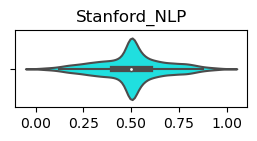

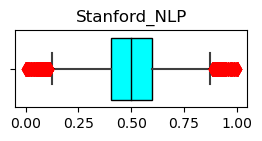

In [47]:
Violin_Plot(result,'Stanford_NLP')
Box_Plot(result,'Stanford_NLP')

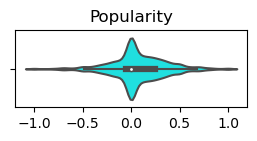

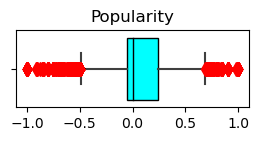

In [48]:
Violin_Plot(result,'Popularity')
Box_Plot(result,'Popularity')

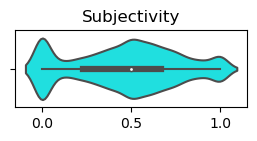

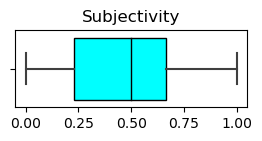

In [49]:
Violin_Plot(result,'Subjectivity')
Box_Plot(result,'Subjectivity')

#####   

#####   